This Notebook is for analyzing the city-data Dataset.
We start by importing the neccessary libraries.

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import mplcursors

reading the Dataset

In [3]:
data = pd.read_csv('../city_data.csv', delimiter='|')

Preprocessing the dataset:

Adjusting the columns,
Splitting the city-country column into two seperate columns for better readability, 
removing a column with two many missing values,
and removing duplicate rows.


In [4]:
new_header = data.iloc[0]
data = data[1:]
data.columns = new_header

cities = []
states = []
for i in range(len(data)):
    if ',' in data.iloc[i]["City"]:
        city_and_state = data.iloc[i]["City"].split(",")
    elif '.' in data.iloc[i]["City"]:
        city_and_state = data.iloc[i]["City"].split(".")
    else:
        city_and_state = data.iloc[i]["City"].split(";")
         
    cities.append(city_and_state[0])
    if len(city_and_state) > 1:
        states.append(city_and_state[1])
    else:
        states.append("")

data.drop(columns=['City'], inplace=True)
data.insert(0, 'City', cities)
data.insert(1, 'Country', states)

data.drop(columns=['Average Price Groceries'], inplace=True)

data.drop_duplicates(inplace=True)

Changing the dtype of numeric columns

In [5]:
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except:
        pass  # keep text columns (City, Country) as is

Checking for outliers

In [29]:
for col in ['Population Density', 'Population',
       'Working Age Population ', 'Youth Dependency Ratio',
       'Unemployment Rate', 'GDP per Capita',
       'Days of very strong heat stress', 'Average Monthly Salary', 'Avgerage Rent Price',
       'Average Cost of Living', 'Last Data Update']:

    print("")
    print(col)

    seventy_fifth = data[col].quantile(0.75)
    twenty_fifth = data[col].quantile(0.25)
    population_iqr = seventy_fifth - twenty_fifth
    upper = seventy_fifth + (1.5 * population_iqr)
    lower = twenty_fifth - (1.5 * population_iqr)

    print("upper:", upper)
    print("lower:", lower)

    print(data[(data[col] > upper) |(data[col] < lower)]\
        [['City', col]])


Population Density
upper: 2157.25
lower: -824.75
0        City  Population Density
35    Tallinn              2469.0
38      Paris             20983.0
39       Lyon             10909.0
40   Toulouse              4300.0
57     Naples              2615.0
64  The Hague              2646.0

Population
upper: 4870847.75
lower: -2092906.25
0        City  Population
16     Berlin     5303922
29     Madrid     6882461
30  Barcelona     5034925
41     London    12396541
56      Milan     4965808

Working Age Population 
upper: 3195680.5
lower: -1352767.5
0        City  Working Age Population 
16     Berlin                3481212.0
29     Madrid                4617753.0
30  Barcelona                3331345.0
41     London                8274794.0
85     Ankara                3417691.0

Youth Dependency Ratio
upper: 32.9125
lower: 14.612500000000002
0    City  Youth Dependency Ratio
86  Adana                    37.8

Unemployment Rate
upper: 13.95
lower: -2.4499999999999993
0           City  Une

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Population Density


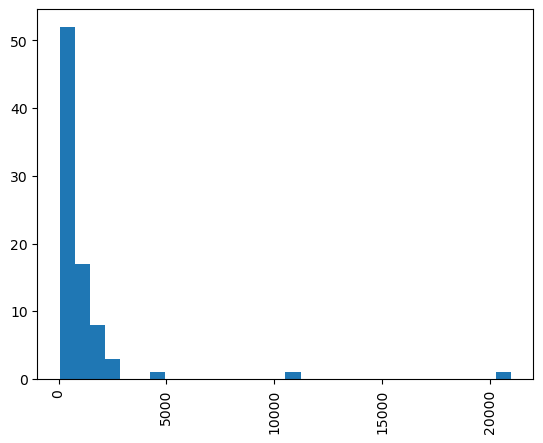

Population


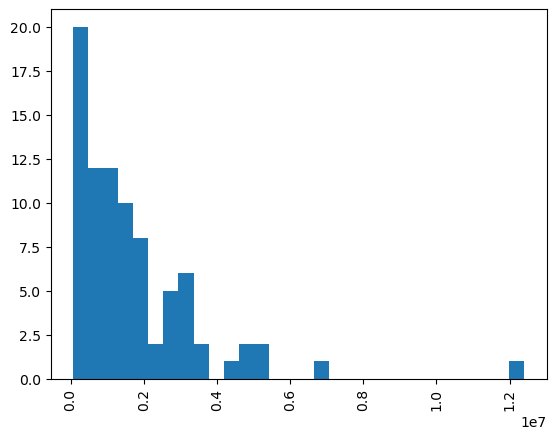

Working Age Population 


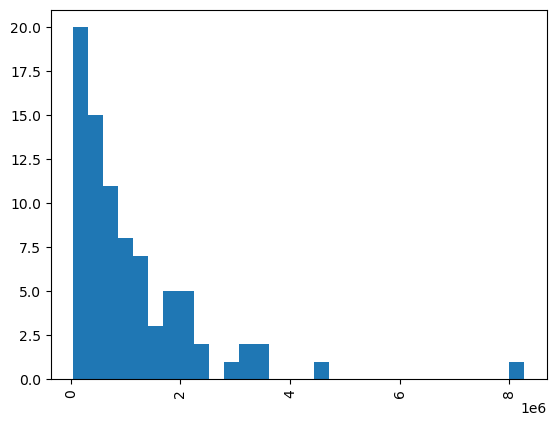

Youth Dependency Ratio


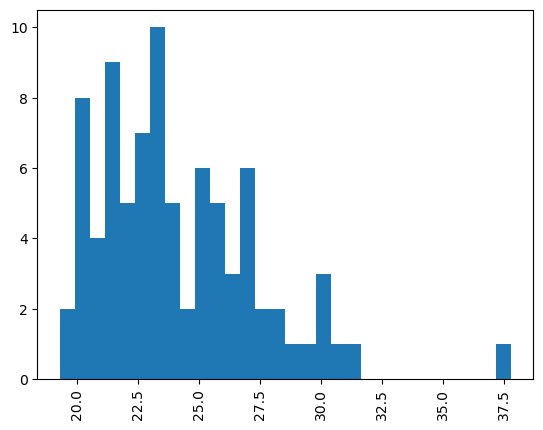

Unemployment Rate


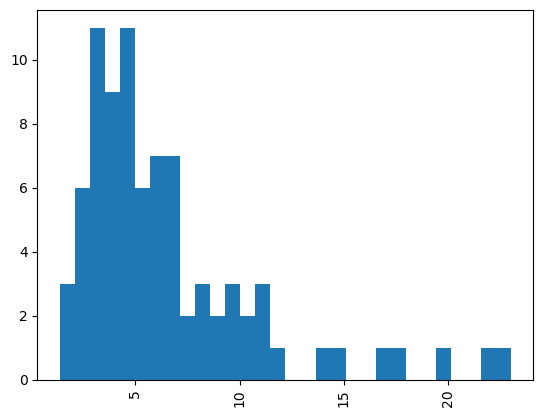

GDP per Capita


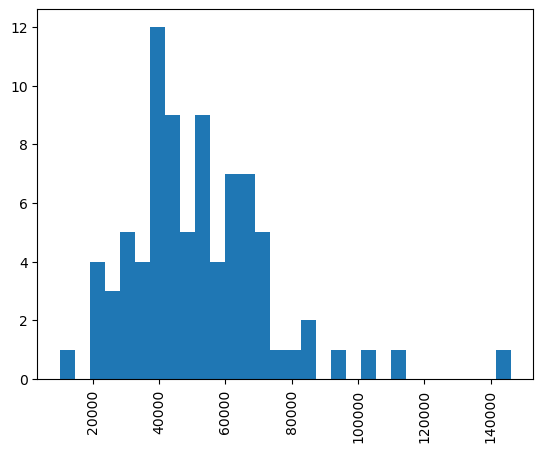

Days of very strong heat stress


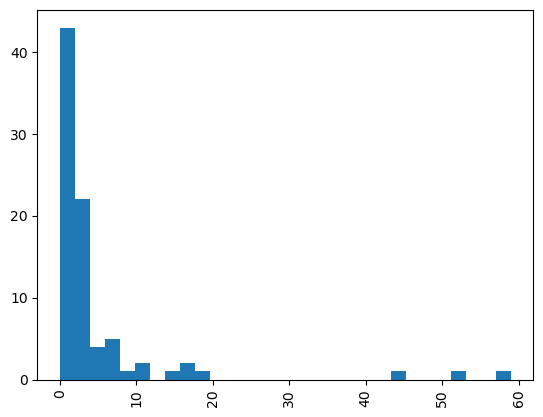

Average Monthly Salary


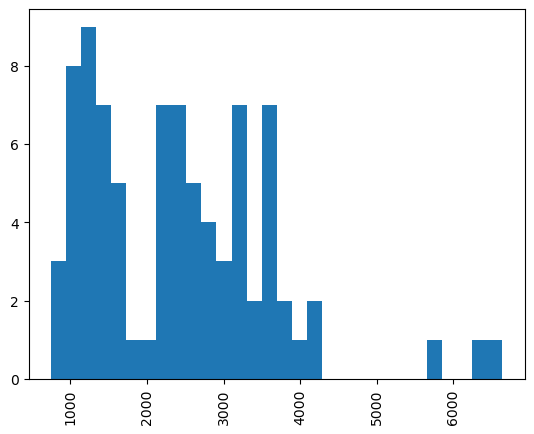

Avgerage Rent Price


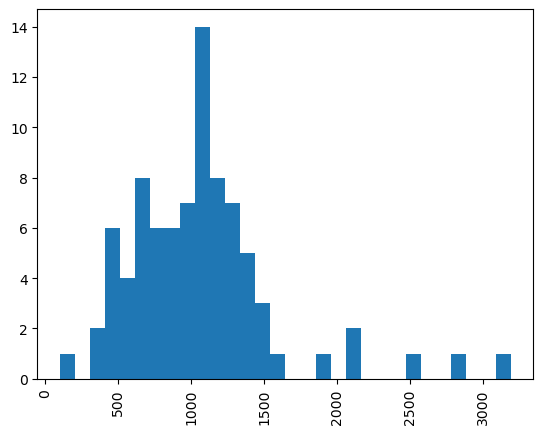

Average Cost of Living


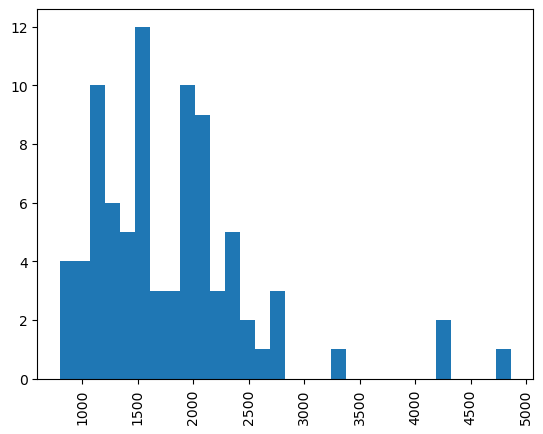

Last Data Update


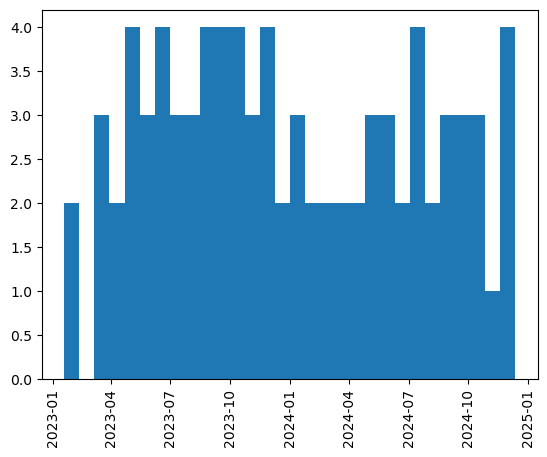

In [23]:
for col in ['Population Density', 'Population',
       'Working Age Population ', 'Youth Dependency Ratio',
       'Unemployment Rate', 'GDP per Capita',
       'Days of very strong heat stress', 'Average Monthly Salary', 'Avgerage Rent Price',
       'Average Cost of Living', 'Last Data Update']:
    print(col)
    if col == 'Last Data Update':
      plt.hist(pd.to_datetime(data[col]), bins=30)
    else:
       plt.hist(data[col], bins=30)
    plt.xticks(rotation=90)
    plt.show()

Apply Knn Imputation for replacing missing values in the dataset

In [35]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaled = scaler.fit_transform(data[numeric_cols])

imputer = KNNImputer(n_neighbors=7)
imputed_scaled = imputer.fit_transform(scaled)

# Inverse scale back
imputed = scaler.inverse_transform(imputed_scaled)

# Put back into DataFrame
data[numeric_cols] = imputed

Data about quantity of cities

In [36]:
cities_count_ser = data.groupby('Country')['City'].count().sort_values(ascending=False)
amount_of_cities = pd.DataFrame({"Number of Cities": cities_count_ser})
total_number_of_cities = amount_of_cities['Number of Cities'].sum()
print("\nCities Summery:\n")
print(amount_of_cities)
print(f"\nAmount of Cities in total: {total_number_of_cities}\n")


Cities Summery:

                  Number of Cities
Country                           
 Germany                        10
 Italy                           6
 United Kingdom                  5
 Netherlands                     5
 Spain                           5
 Portugal                        4
 Belgium                         4
 Poland                          3
 Norway                          3
 Sweden                          3
 Hungary                         3
 Switzerland                     3
 France                          2
 Finland                         2
 Ireland                         2
 Turkiye                         2
 Denmark                         2
 Czechia                         2
 Croatia                         2
 Bulgaria                        2
 Austria                         2
 Romania                         1
 Slovenia                        1
 Slovak Republic                 1
  France                         1
 Malta                           1
 L

Cities with the highest salary

In [37]:
print("\nHigh Salary Cities:\n")
print(data[data["Average Monthly Salary"] > 1600].sort_values(by='Average Monthly Salary', ascending=False)[["City", "Average Monthly Salary"]])


High Salary Cities:

0                City  Average Monthly Salary
9              Zurich                  6636.0
11              Basel                  6366.0
10             Geneva                  5794.0
27         Copenhagen                  4200.0
61         Luxembourg                  4200.0
36           Helsinki                  3900.0
21  Frankfurt am Main                  3800.0
65          Amsterdam                  3750.0
69               Oslo                  3600.0
19             Munich                  3540.0
64          The Hague                  3500.0
37            Tampere                  3500.0
70             Bergen                  3500.0
18            Hamburg                  3500.0
71          Stavanger                  3500.0
28             Odense                  3400.0
3            Brussels                  3350.0
38              Paris                  3300.0
22          Stuttgart                  3300.0
20            Cologne                  3200.0
2           

Cities with low cost of living

In [38]:
print("\nLow Cost of living:\n")
print(data[data["Average Cost of Living"] < 900].sort_values(by="Average Cost of Living", ascending=False)[["City", "Average Cost of Living"]])


Low Cost of living:

0    City  Average Cost of Living
86  Adana                   800.0


Difference between salary and cost of living


Positive difference between cost of living and salary:

0       City  avg salary - avg cost of living
11     Basel                           2127.0
37   Tampere                           1900.0
36  Helsinki                           1850.0
9     Zurich                           1774.0
10    Geneva                           1531.0

Negative difference between cost of living and salary:

0     City  avg salary - avg cost of living
75  Lisbon                           -380.0
76   Porto                           -300.0
46  Greece                           -150.0
60  Venice                           -100.0
74  Cracow                           -100.0

Average difference:

619.5833333333334

The Country in crisis:

 Portugal : -207

The Country in best condition:

 Finland : 1875


<Axes: >

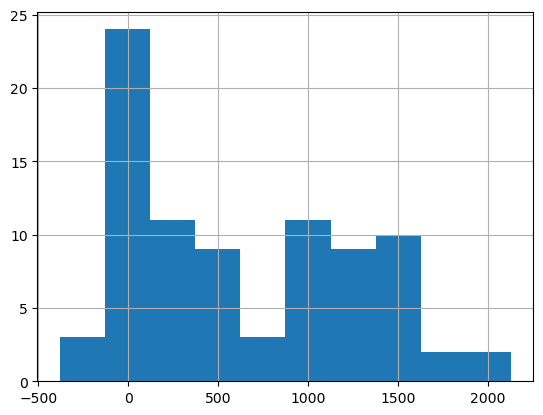

In [39]:
data["avg salary - avg cost of living"] = data["Average Monthly Salary"] - data["Average Cost of Living"]
print("\nPositive difference between cost of living and salary:\n")
print(data[['City', "avg salary - avg cost of living"]].sort_values(by='avg salary - avg cost of living', ascending=False).head(5))

print("\nNegative difference between cost of living and salary:\n")
print(data[['City', "avg salary - avg cost of living"]].sort_values(by='avg salary - avg cost of living', ascending=True).head(5))

print("\nAverage difference:\n")
print(data["avg salary - avg cost of living"].mean())

differences_by_country = data.groupby('Country')['avg salary - avg cost of living'].mean()
print("\nThe Country in crisis:\n")
print(f"{differences_by_country.sort_values().head(1).index[0]} : {int(differences_by_country.sort_values().head(1).values[0])}")

print("\nThe Country in best condition:\n")
print(f"{differences_by_country.sort_values(ascending=False).head(1).index[0]} : {int(differences_by_country.sort_values(ascending=False).head(1).values[0])}")

data["avg salary - avg cost of living"].hist()

Correlation between salary and cost of living

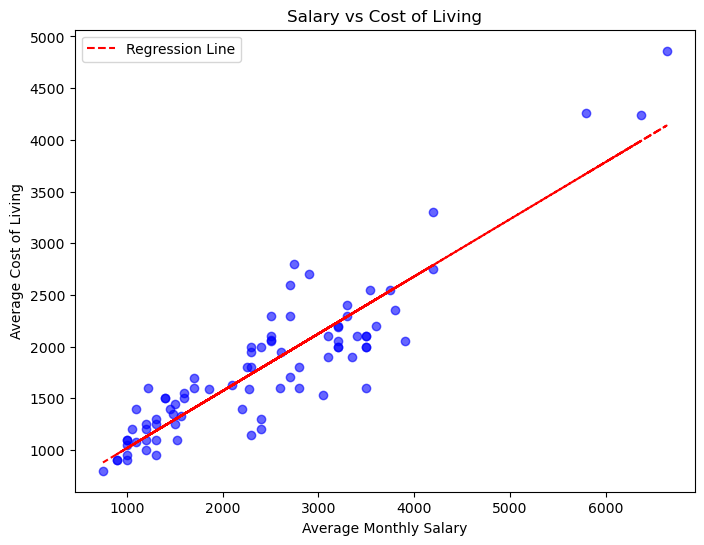

In [40]:
# Prepare data
x = data["Average Monthly Salary"].values.reshape(-1, 1)
y = data["Average Cost of Living"].values

# Fit linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Close any existing figures (prevents leftover lines from previous interactive runs)
plt.close('all')

# Scatter plot
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(x, y, c='blue', alpha=0.6)

# Regression line
ax.plot(x, y_pred, color='red', linestyle='--', label='Regression Line')


ax.set_xlabel("Average Monthly Salary")
ax.set_ylabel("Average Cost of Living")
ax.set_title("Salary vs Cost of Living")
ax.legend()

# Make points clickable to show city
cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    index = sel.index
    sel.annotation.set(text=data.iloc[index]["City"])

plt.show()

The most spoken languages

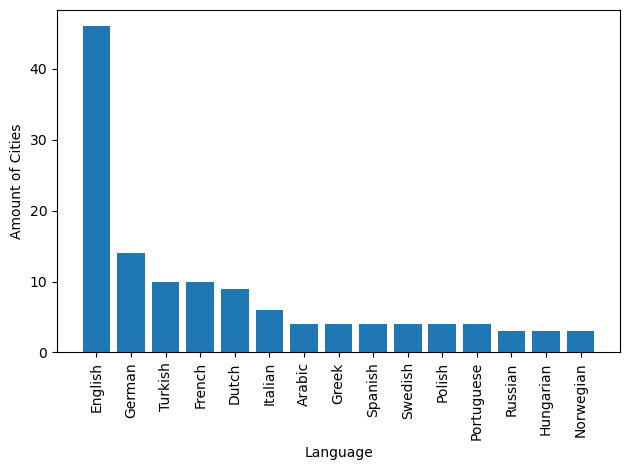

In [41]:
languages = {}
english_spoken = []
for item in data['Main Spoken Languages']:
    lst = str(item).split(",")
    eng = False
    for i in lst:
        i = i.strip()
        if i == 'English':
            eng = True
        if i not in languages:
            languages[i] = 1
        else:
            languages[i] += 1
    english_spoken.append(eng)

data['english_spoken'] = english_spoken

languages = sorted(languages.items(), key=lambda x: x[1], reverse=True)

spoken_languages, counts = map(list, zip(*languages))

plt.bar(x=spoken_languages[:15], height=counts[:15])
plt.xticks(rotation=90)
plt.xlabel('Language')
plt.ylabel('Amount of Cities')
plt.tight_layout()
plt.show()

Cities with the most poeple unemployed:

In [42]:
data['unemployed_amt'] = data['Working Age Population '] * (data['Unemployment Rate'] / 100)
data['unemployed_amt'] = data['unemployed_amt'].astype(np.int64)

print("\nCities with the most people unemployed:\n")
print(data[['City', 'unemployed_amt']]\
      .sort_values(by='unemployed_amt', ascending=False).head().set_index('City'))


Cities with the most people unemployed:

0       unemployed_amt
City                  
Naples          519495
London          504762
Madrid          498717
Ankara          492147
Greece          393393


Comparing English speaking cities with Non-English speaking cities

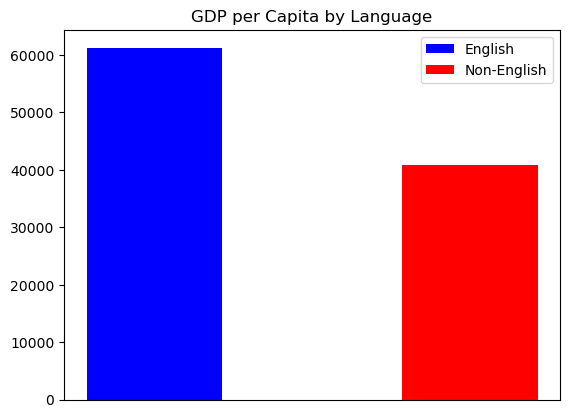

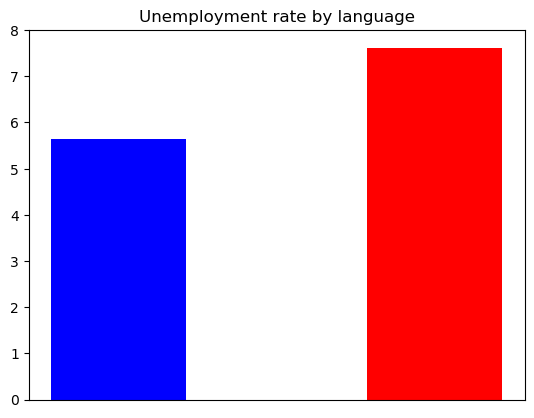

In [43]:
english_speaking_cities = data[data['english_spoken'] == True]
non_english_speaking_cities = data[data['english_spoken'] == False]

gdp_eng = english_speaking_cities['GDP per Capita'].mean()
gdp_non_eng = non_english_speaking_cities['GDP per Capita'].mean()

unemployment_eng = english_speaking_cities['Unemployment Rate'].mean()
unemployment_non_eng = non_english_speaking_cities['Unemployment Rate'].mean()

fig, ax = plt.subplots()

x = np.array([0])

ax.bar(x - 0.35/2, [gdp_eng], 0.15, label='English', color='blue')
ax.bar(x + 0.35/2, [gdp_non_eng], 0.15, label='Non-English', color='red')
ax.set_title('GDP per Capita by Language')
ax.set_xticks([])
ax.legend()

fig2, ax2 = plt.subplots()
ax2.bar(x - 0.35/2, unemployment_eng, 0.15, label='English', color='blue')
ax2.bar(x + 0.35/2, unemployment_non_eng, 0.15, label='Non-English', color='red')
ax2.set_title('Unemployment rate by language')
ax2.set_xticks([])
ax.legend()

plt.show()

Negative Correlation between Unemployment rate and GDP per Capita

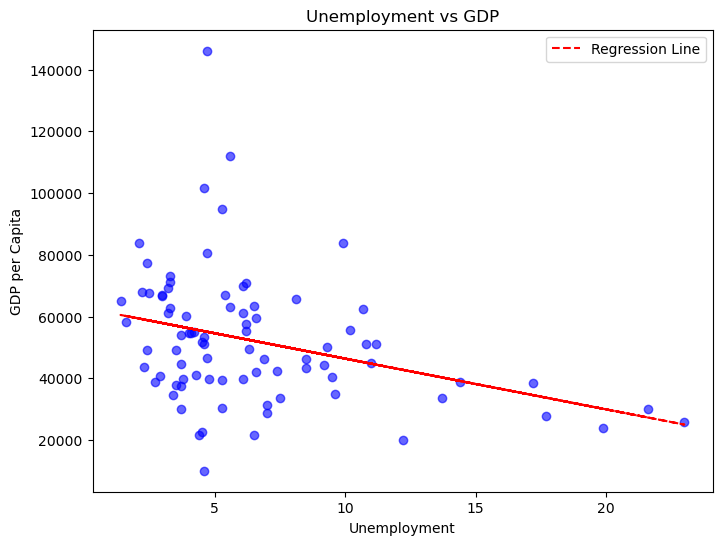

In [44]:
# Prepare data
x = data["Unemployment Rate"].values.reshape(-1, 1)
y = data["GDP per Capita"].values 

# Fit linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Close any existing figures (prevents leftover lines from previous interactive runs)
plt.close('all')

# Scatter plot
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(x, y, c='blue', alpha=0.6)

# Regression line
ax.plot(x, y_pred, color='red', linestyle='--', label='Regression Line')


ax.set_xlabel("Unemployment")
ax.set_ylabel("GDP per Capita")
ax.set_title("Unemployment vs GDP")
ax.legend()

# Make points clickable to show city
cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    index = sel.index
    sel.annotation.set(text=data.iloc[index]["City"])

plt.show()

Analysis of the dates and time in which the dataset was edited

In [45]:
print('\nCities which require updates (last update made was before April 2023): \n')
print(data[data['Last Data Update'] < '2023-04-01'][['City', 'Last Data Update']]\
      .sort_values(by='Last Data Update', ascending=True).set_index('City'))

print("\n\nThe most recent update: \n")
print(data[['City', 'Last Data Update']].sort_values(by='Last Data Update', ascending=False).head(1))


Cities which require updates (last update made was before April 2023): 

0                     Last Data Update
City                                  
Basel              2023-01-19 00:00:00
Frankfurt am Main  2023-02-04 00:00:00
Gothenburg         2023-03-10 00:00:00
Munich             2023-03-16 00:00:00
Venice             2023-03-23 00:00:00
Lyon               2023-03-31 00:00:00


The most recent update: 

0   City     Last Data Update
69  Oslo  2024-12-12 00:00:00
